**Instituto Tecnológico de Aeronáutica – ITA**

**Inteligência Artificial PEE 2022**

**Faculty Advisor:**

Marcos Ricardo Omena de Albuquerque Maximo

# Otimização com Métodos de Busca Local

# Descrição do problema

O problema ser resolvido é a otimização de funções matemáticas (em que é possível obter amostras da função e de sua derivada) usando os métodos descritos, assim sua implementação não deve ser específica para o caso de teste. As descrições dos algoritmos que serão implementados podem ser vistas nos slides do curso.

No caso de teste, o problema específico a ser resolvido é a determinação do coeficiente de desaceleração de uma bola em movimento num campo de futebol de robôs. A bola em movimento perde energia devido a um fenômeno conhecido como *rolling friction*. Conforme explicado em aula, pode-se determinar o coeficiente de desaceleração através do seguinte algoritmo:

1. Usar câmera e visão computacional para obter posições $(x,y)$ da bola em cada instante.
2. Calcular velocidades em $x$ e $y$ usando diferenças finitas centradas (exceto no primeiro e último elementos, em que deve-se usar derivadas *forward* e *backward*, respectivamente):

    $$v_x [k]=(x[k+1]-x[k-1])/(t[k+1]-t[k-1])$$
    $$v_y [k]=(y[k+1]-y[k-1])/(t[k+1]-t[k-1])$$

3. Calcular $v[k]= \sqrt{v_x^2[k] + v_y^2[k]}$.
4. Obter $v_0$ e $f$ através de uma otimização com função de custo:

    $$J([v_0,f])= \sum_{k=1}^n (v_0 + ft[k]-v[k])^2$$
    
Desse modo, tem-se os seguintes parâmetros a serem otimizados: 

$\theta_0 = v_0$ e $\theta_1 = f \Rightarrow \boldsymbol{\theta} =[v_0  \: f]^T$

# Carregamento do arquivo de dados

Rode a célula a seguir e carregue o arquivo data.txt contendo dados reais capturados com uma câmera.

In [13]:
# from google.colab import files
# uploaded = files.upload()

# Algoritmos já implementados!

Sugiro que leia as implementações a seguir para melhor entender como as interfaces dos algoritmos funcionam.

In [14]:
import numpy as np

def least_squares(phi, x, y):
    """
    Executes the Least Squares Method in order to fit a model to a collection of data points (x, y).

    :param phi: functions of the model.
    :type phi: list of functions.
    :param x: independent variable.
    :type x: numpy.array of float.
    :param y: dependent variable.
    :type y: numpy.array of float.
    :return: least square estimate of the model parameters.
    :rtype: numpy.array of float.
    """
    m = len(x)
    n = len(phi) - 1
    a = np.zeros((n + 1, n + 1))
    b = np.zeros((n + 1))
    # Making matrix A
    for k in range(n + 1):
        for j in range(n + 1):
            for i in range(m):
                a[k, j] += phi[k](x[i]) * phi[j](x[i])

    # Making vector b
    for j in range(n + 1):
        for i in range(m):
            b[j] += phi[j](x[i]) * y[i]

    # Solving system A * x = b
    theta = np.linalg.solve(a, b)
    return theta

In [15]:
from math import exp
import random


def simulated_annealing(cost_function, random_neighbor, schedule, theta0, epsilon, max_iterations):
    """
    Executes the Simulated Annealing (SA) algorithm to minimize (optimize) a cost function.

    :param cost_function: function to be minimized.
    :type cost_function: function.
    :param random_neighbor: function which returns a random neighbor of a given point.
    :type random_neighbor: numpy.array.
    :param schedule: function which computes the temperature schedule.
    :type schedule: function.
    :param theta0: initial guess.
    :type theta0: numpy.array.
    :param epsilon: used to stop the optimization if the current cost is less than epsilon.
    :type epsilon: float.
    :param max_iterations: maximum number of iterations.
    :type max_iterations: int.
    :return theta: local minimum.
    :rtype theta: np.array.
    :return history: history of points visited by the algorithm.
    :rtype history: list of np.array.
    """
    theta = theta0
    history = []
    for i in range(max_iterations):
        history.append(theta)
        current_cost = cost_function(theta)
        if current_cost < epsilon:
            return theta, history
        t = schedule(i)
        if t <= 0.0:
            return theta, history
        neighbor = random_neighbor(theta)
        deltae = cost_function(neighbor) - current_cost
        if deltae < 0.0:
            theta = neighbor
        else:
            r = random.uniform(0.0, 1.0)
            if r <= exp(-deltae / t):
                theta = neighbor
    return theta, history

# Algoritmos para implementar

Dicas:
- As implementações são similares aos pseudocódigos mostrados em aula.
- Como critério de parada, verifique se o custo atual é menor que um epsilon, i.e. verifique se $J(\boldsymbol{\theta})<\varepsilon$.
- As implementações devem ser genéricas e não depende do problema em específico que estamos resolvido neste exercício.
- A variável `history` deve ser usada para guardar as posições que o algoritmo visita durante a otimização.
- Leia as documentações das funções para entender quais são as entradas e as saídas.

In [16]:
def gradient_descent(cost_function, gradient_function, theta0, alpha, epsilon, max_iterations):
    """
    Executes the Gradient Descent (GD) algorithm to minimize (optimize) a cost function.

    :param cost_function: function to be minimized.
    :type cost_function: function.
    :param gradient_function: gradient of the cost function.
    :type gradient_function: function.
    :param theta0: initial guess.
    :type theta0: numpy.array.
    :param alpha: learning rate.
    :type alpha: float.
    :param epsilon: used to stop the optimization if the current cost is less than epsilon.
    :type epsilon: float.
    :param max_iterations: maximum number of iterations.
    :type max_iterations: int.
    :return theta: local minimum.
    :rtype theta: numpy.array.
    :return history: history of points visited by the algorithm.
    :rtype history: list of numpy.array.
    """
    theta = theta0
    history = [theta0]
    # Todo: Implement Gradient Descent
    return theta, history

In [17]:
from math import inf

def hill_climbing(cost_function, neighbors, theta0, epsilon, max_iterations):
    """
    Executes the Hill Climbing (HC) algorithm to minimize (optimize) a cost function.

    :param cost_function: function to be minimized.
    :type cost_function: function.
    :param neighbors: function which returns the neighbors of a given point.
    :type neighbors: list of numpy.array.
    :param theta0: initial guess.
    :type theta0: numpy.array.
    :param epsilon: used to stop the optimization if the current cost is less than epsilon.
    :type epsilon: float.
    :param max_iterations: maximum number of iterations.
    :type max_iterations: int.
    :return theta: local minimum.
    :rtype theta: numpy.array.
    :return history: history of points visited by the algorithm.
    :rtype history: list of numpy.array.
    """
    theta = theta0
    history = [theta0]
    # Todo: Implement Hill Climbing
    return theta, history

# Definindo funções auxiliares

In [18]:
import numpy as np
import random
from math import pi, cos, sin
import matplotlib.pyplot as plt


def plot_learning_curve(history):
    """
    Plots the learning curve.

    :param history: points visited by the optimization algorithm.
    :type history: list of numpy.array.
    """
    costs = [cost_function(theta) for theta in history]
    plt.plot(costs)
    plt.grid()


def plot_optimization(history):
    """
    Plots the optimization history.

    :param history: points visited by the optimization algorithm.
    :type history: list of numpy.array.
    """
    t0 = np.arange(-0.5, 0.5, 0.01)
    t1 = np.arange(-0.5, 0.5, 0.01)
    z = np.zeros((len(t0), len(t1)))
    for i in range(len(t0)):
        for j in range(len(t1)):
            z[i, j] = cost_function(np.array([t0[i], t1[j]]))
    plt.contourf(t0, t1, z.transpose())
    hx = []
    hy = []
    for h in history:
        hx.append(h[0])
        hy.append(h[1])
    plt.xlabel('v_0 (m/s)')
    plt.ylabel('f (m/s^2)')
    handle, = plt.plot(hx, hy, '.-', markersize=5)
    plt.plot(hx[0], hy[0], '*y')
    plt.plot(hx[-1], hy[-1], 'xr')
    return handle


def cost_function(theta):
    """
    Samples the linear regression cost function.

    :param theta: parameter point.
    :type theta: numpy.array.
    :return: cost value at theta.
    :rtype: float.
    """
    return sum((theta[0] + theta[1] * t - v) ** 2) / (2.0 * m)


def gradient_function(theta):
    """
    Samples the gradient of the linear regression cost function.

    :param theta: parameter point.
    :type theta: numpy.array.
    :return: gradient at theta.
    :rtype: float.
    """
    return np.array([(1 / m) * sum(theta[0] + theta[1] * t - v),
                    (1 / m) * sum((theta[0] + theta[1] * t - v) * t)])


def fit_least_squares():
    """
    Uses the Least Squares Method to fit the ball parameters.

    :return: array containing the initial speed and the acceleration factor due to rolling friction.
    :rtype: numpy.array.
    """
    return least_squares([lambda x: 1.0, lambda x: x], t, v)


def fit_gradient_descent():
    """
    Uses Gradient Descent (GD) to fit the ball parameters.

    :return theta: array containing the initial speed and the acceleration factor due to rolling friction.
    :rtype theta: numpy.array.
    :return history: history of points visited by the algorithm.
    :rtype history: list of numpy.array.
    """
    theta, history = gradient_descent(cost_function, gradient_function, np.array([0.0, 0.0]), 0.1, 1.0e-10, 1000)
    return theta, history


def fit_hill_climbing():
    """
    Uses Hill Climbing (HC) to fit the ball parameters.

    :return theta: array containing the initial speed and the acceleration factor due to rolling friction.
    :rtype theta: numpy.array.
    :return history: history of points visited by the algorithm.
    :rtype history: list of numpy.array.
    """
    delta = 2.0e-3
    num_neighbors = 8

    def neighbors(theta):
        """
        Returns 8-connected neighbors of point theta.
        The neighbors are sampled around a circle of radius "delta".
        Equally spaced (in terms of angle) "num_neighbors" neighbors are sampled.

        :param theta: current point.
        :type theta: numpy.array.
        :return: neighbors of theta.
        :rtype: list of numpy.array.
        """
        neigh = []
        delta_angle = 2 * pi / num_neighbors
        for a in range(num_neighbors):
            neigh.append(np.array([theta[0] + delta * cos(a * delta_angle), theta[1] + delta * sin(a * delta_angle)]))
        return neigh

    theta, history = hill_climbing(cost_function, neighbors, np.array([0.0, 0.0]), 1.0e-10, 1000)
    return theta, history


def fit_simulated_annealing():
    """
    Uses Simulated Annealing (SA) to fit the ball parameters.

    :return theta: array containing the initial speed and the acceleration factor due to rolling friction.
    :rtype theta: numpy.array.
    :return history: history of points visited by the algorithm.
    :rtype history: list of numpy.array.
    """
    temperature0 = 1.0
    beta = 1.0
    delta = 2.0e-3

    def random_neighbor(theta):
        """
        Returns a random neighbor of theta.
        The random neighbor is sampled around a circle of radius <delta>.
        The probability distribution of the angle is uniform(-pi, pi).

        :param theta: current point.
        :type theta: numpy.array.
        :return: random neighbor.
        :rtype: numpy.array.
        """
        direction = random.uniform(-pi, pi)
        return np.array([theta[0] + delta * cos(direction), theta[1] + delta * sin(direction)])

    def schedule(i):
        """
        Defines the temperature schedule of the simulated annealing.

        :param i: current iteration.
        :type i: int.
        :return: current temperature.
        :rtype: float.
        """
        return temperature0 / (1.0 + beta * i * i)

    theta, history = simulated_annealing(cost_function, random_neighbor, schedule, np.array([0.0, 0.0]), 1.0e-10, 5000)
    return theta, history

# Resolvendo o problema de *fit* usando os algoritmos de otimização

In [19]:
fig_format = 'png'

# Setting random seed for reproducibility
random.seed(100)
# Loading and pre-processing data
data = np.genfromtxt('data.txt')
t = data[:, 0]
x = data[:, 1]
y = data[:, 2]
t -= t[0]
m = len(t)
vx = np.zeros(m)
vy = np.zeros(m)
vx[0] = (x[1] - x[0]) / (t[1] - t[0])
vy[0] = (y[1] - y[0]) / (t[1] - t[0])
for k in range(1, m - 1):
    vx[k] = (x[k + 1] - x[k - 1]) / (t[k + 1] - t[k - 1])
    vy[k] = (y[k + 1] - y[k - 1]) / (t[k + 1] - t[k - 1])
vx[-1] = (x[-1] - x[-2]) / (t[-1] - t[-2])
vy[-1] = (y[-1] - y[-2]) / (t[-1] - t[-2])
v = np.sqrt(vx ** 2 + vy ** 2)

# Solving the problem using Least Squares in order to obtain ground truth
theta_ls = fit_least_squares()
print('Least Squares solution: ', theta_ls)
# Solving the problem using each algorithm
theta_gd, history_gd = fit_gradient_descent()
print('Gradient Descent solution: ', theta_gd)
theta_hc, history_hc = fit_hill_climbing()
print('Hill Climbing solution: ', theta_hc)
theta_sa, history_sa = fit_simulated_annealing()
print('Simulated Annealing solution: ', theta_sa)

Least Squares solution:  [ 0.43337277 -0.10102096]
Gradient Descent solution:  [0. 0.]
Hill Climbing solution:  [0. 0.]
Simulated Annealing solution:  [ 0.43397656 -0.10134529]


# Traçando a evolução X-Y

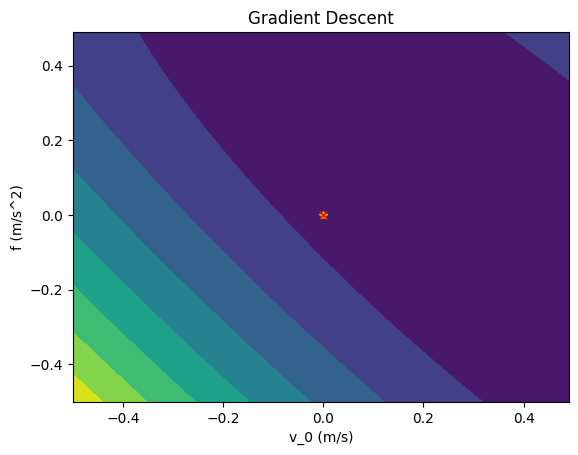

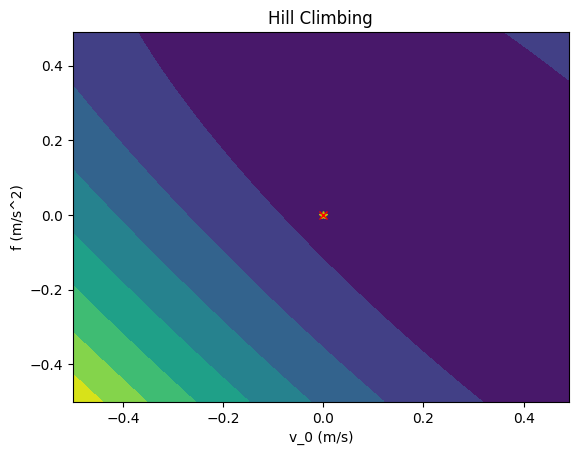

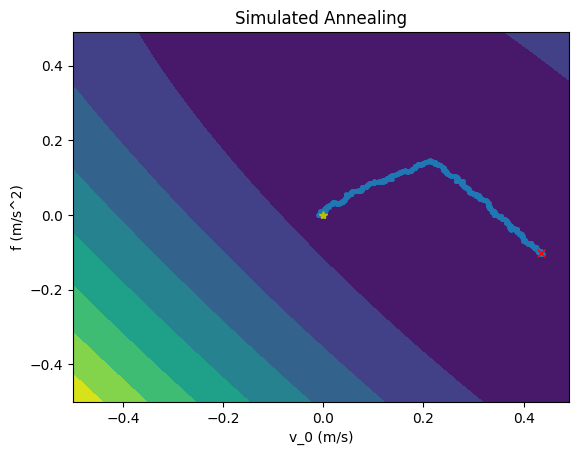

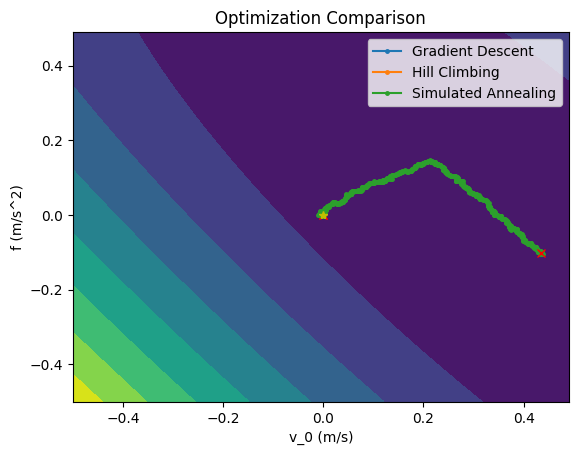

In [20]:
plt.figure()
plot_optimization(history_gd)
plt.title('Gradient Descent')
plt.savefig('xy_gradient_descent.%s' % fig_format, format=fig_format)
plt.figure()
plot_optimization(history_hc)
plt.title('Hill Climbing')
plt.savefig('xy_hill_climbing.%s' % fig_format, format=fig_format)
plt.figure()
plot_optimization(history_sa)
plt.title('Simulated Annealing')
plt.savefig('xy_simulated_annealing.%s' % fig_format, format=fig_format)

# Plotting the optimization histories in a single plot for comparison
plt.figure()
handle_gd = plot_optimization(history_gd)
handle_hc = plot_optimization(history_hc)
handle_sa = plot_optimization(history_sa)
plt.legend([handle_gd, handle_hc, handle_sa], ['Gradient Descent', 'Hill Climbing', 'Simulated Annealing'])
plt.title('Optimization Comparison')
plt.savefig('xy_comparison.%s' % fig_format, format=fig_format)

# Traçando as curvas de aprendizado

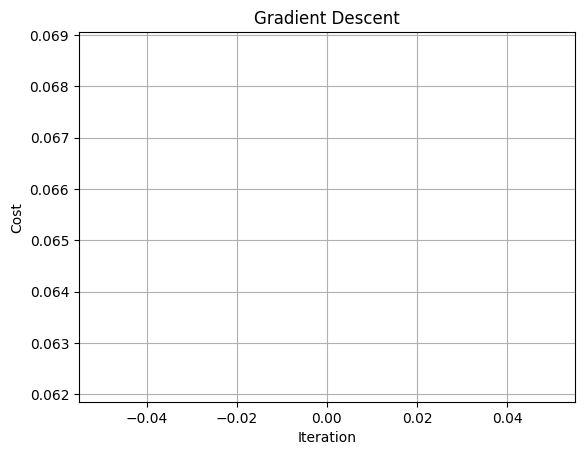

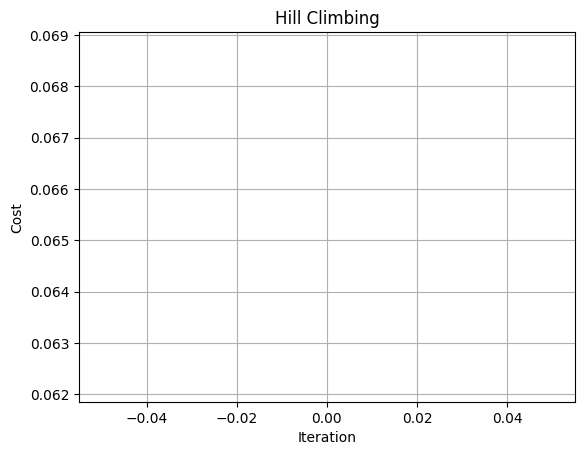

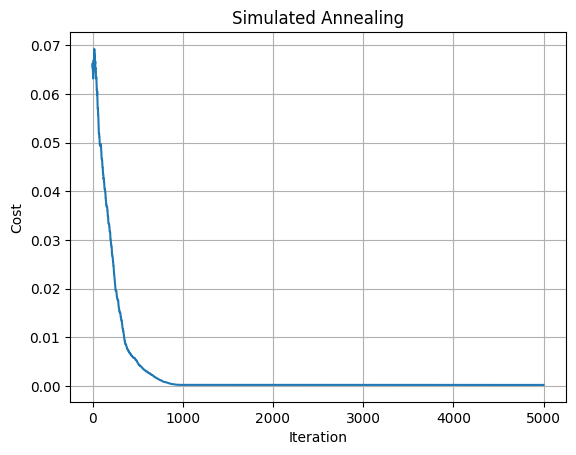

In [21]:
# Plotting learning curves
plt.figure()
plot_learning_curve(history_gd)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent')
plt.savefig('learning_gradient_descent.%s' % fig_format, format=fig_format)
plt.figure()
plot_learning_curve(history_hc)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Hill Climbing')
plt.savefig('learning_hill_climbing.%s' % fig_format, format=fig_format)
plt.figure()
plot_learning_curve(history_sa)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Simulated Annealing')
plt.savefig('learning_simulated_annealing.%s' % fig_format, format=fig_format)

# Traçando a curva ajustada

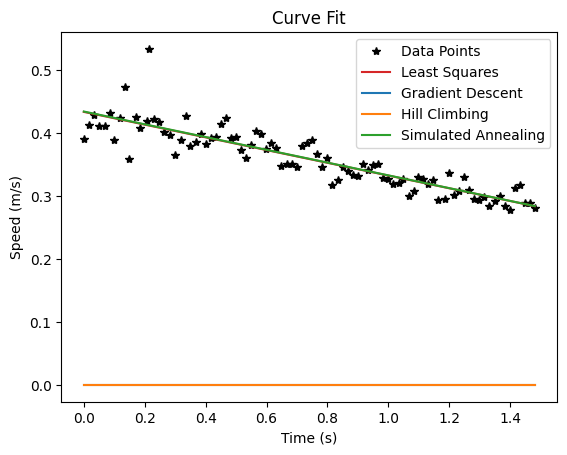

In [22]:
# Plotting the curve fit
plt.figure()
plt.plot(t, v, '*k')
v_ls = theta_ls[0] + theta_ls[1] * t
v_gd = theta_gd[0] + theta_gd[1] * t
v_hc = theta_hc[0] + theta_hc[1] * t
v_sa = theta_sa[0] + theta_sa[1] * t
plt.plot(t, v_ls, 'tab:red')
plt.plot(t, v_gd, 'tab:blue')
plt.plot(t, v_hc, 'tab:orange')
plt.plot(t, v_sa, 'tab:green')
plt.xlabel('Time (s)')
plt.ylabel('Speed (m/s)')
plt.legend(['Data Points', 'Least Squares', 'Gradient Descent', 'Hill Climbing', 'Simulated Annealing'])
plt.title('Curve Fit')
plt.savefig('fit_comparison.%s' % fig_format, format=fig_format)